# Table of Contents
- [Classification of the Iris dataset with a MLP](#Classification-of-the-Iris-dataset-with-a-MLP)
- [Binary classification of the IMDB movie reviews dataset with a MLP](#Binary-classification-of-the-IMDB-movie-reviews-dataset-with-a-MLP)

# 1  Classification of the Iris dataset with a MLP
In this exercise, we will build a small very simple MLP to classify irises into 3 dif-ferent species based on 4 measurements. We will keep this exercise very simple.Some things donotrepresent best practices

## 1.1  Load the Data
The iris dataset is built-in intosklearn.datasets. We use `return_X_y=True` to get a numpy array with the features, and a numpy array with the targets.Check the shape of these arrays. They should be`(150, 4)` and `(150, )`

In [ ]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
X # Features
y # labels
(X,y)

In [ ]:
!pip install keras

## 1.2  Build a MLP
We want to build an MLP consisting of:
- An input layer with the correct number of neurons. The name of the layerisinput. How many neurons do we need in the input layer?
- One hidden layer with 5 neurons using the *ReLU£* activation function. Thename of the layer ishidden
- One output layer with the correct number of neurons and the correct activation function for a classification problem. The name of the layer is output.

Follow the steps below:

1. Take a look at the examples on https://keras.io/api/models/sequential/.
2. An example on how to pass the activation function via the string identifier: https://keras.io/api/layers/activations/.
3. Write similar code to create the model.
4. Very often, it is convenient if we can easily recreate a model using a smallfunctionget_model. Rewrite the previous code to a small functionget_modelthat returns the model as described above. Take a look at https://keras.io/api/models/model/#with-the-sequential-class to see an example.
5. Create the model using the functionget_model.
6. Use thesummarymethod of the model to verify that your model has 43 parameters.
7. Convince yourself that you understand where this number comes from!Making a simple sketch of the model can be useful.

In [ ]:
import keras
# dir(model) -> functies bekijken van model

#? https://keras.io/api/layers/core_layers/input/

def get_model():
    model = keras.Sequential()
    model.add(keras.Input(shape=(4,), name="input")) #* input: 1 bij 4
    model.add(keras.layers.Dense(units=5, activation="relu", name="hidden")) # W^[1] = 4 bij 5 -> [4,5]
    model.add(keras.layers.Dense(units=3, activation="softmax", name="output")) # W^[2] = 5 bij 3 -> [5,3]
    return model

model = get_model()
model.summary()

## 1.3  Compile the Model
Compile the model with the following options (example on https://keras.io/api/models/model_training_apis/):
- Use stochastic gradient descent with all the default parameters as the optimizer.
- Specify the correct loss for a multi-class classification problem, where eachinstance belongs to exactly one class. Take into account the shape of thetargets above which is (150, )


In [ ]:

#* https://keras.io/api/models/model_training_apis/
#* https://keras.io/api/losses/probabilistic_losses/#sparsecategoricalcrossentropy-class
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy",metrics=["accuracy"])


# 1.4  Train the Model
Train the model for 20 epochs (example on
https://keras.io/api/models/model_training_apis/). Because we have such a small dataset we will use abatch size of 8 so that we have a reasonable number of updates per epoch.

Note: since we are not using any validation data we have no way of knowing whether the model is overfitting or not. Don’t do this in practice!

In [ ]:
model.fit(X, y, epochs=10,batch_size=8)
#? Epoche is aantal keer dat je over de hele dataset gaat (150 samples)
#? Batch size is aantal groepjes in een epoche en één epoch is dan alle samples (batches) gezien hebben

## 1.5  Emulate the Calculations of the Model
This step is not necessary in practice. We include it here for a better under-standing of what is going on.First, compute the result of the model (the MLP) on a small batch.

1. Create a tensor called `X_batch` which consists of the first two trainingexamples. Use the slice operator. What is the shape of this tensor?

2. Call the model with `X_batch` as the input. Call the resulty_batch_pred.What is the shape of this tensor? What does each dimension mean
3.  Use a function ofkeras.opsto verify that the sum of each row is equalto one.Now, emulate these calculations “by hand” and verify that you get the sameresults.
   
   a.  First, extract the weights of the hidden layer and store them as W1 and b

In [ ]:
# assume"model"is the name as signed to the MLP
W_hidden, bias_hidden = model.get_layer("hidden").get_weights()
print("hidden", W_hidden.shape, bias_hidden.shape)
W_output, bias_output = model.get_layer("output").get_weights()
print("output", W_output.shape, bias_output.shape)

In [ ]:
X_batch = X[:2]
print(X_batch.shape)

Do the same for the weights of the output layer.
b. Verify the shape of these 4 tensors. Make sure that you understand these.
c. Complete the following code, using only methods from `keras.ops`

In [ ]:
z1 = keras.ops.matmul(X_batch, W_hidden) + bias_hidden
a1 = keras.ops.relu(z1)   # apply relu to z1
a1

In [ ]:
z2 = keras.ops.matmul(a1, W_output) + bias_output  # linear transformation of output layer
a2 = keras.ops.softmax(z2)
print(a2)
y_batch_pred_2 = keras.ops.softmax(z2)  # apply appropriate activation function to z2

In [ ]:

#? Model is het volledig bereken
model(X_batch)

# 2  Binary Classification with a MLP
In this exercise, we are going to classify (preprocessed) movie reviews as eitherpositive or negative. We will use the built-in IMDB (Internet Movie Database)Keras dataset for this
## 2.1  Load the Data
1. Use `keras.datasets.imdb.load_data()` to easily download the IMDBdataset.
2. Limit the vocabulary to the 10000 most frequent words, by using thenum_wordsargument. See `https://keras.io/api/datasets/imdb/for` information on how to use this function. A possible way of calling this function is: `(train_data, train_labels), (test_data, test_labels) = YOUR CODE HERE`

In [ ]:
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=10000)

3. Check that both `train_data` and `test_data` contain 25000 examples.

In [ ]:
train_data.shape, train_data.shape

4. Print the features of the first training example. You should see somethinglike: `[1, 14, 22, 16, ..., 178, 32]`

In [ ]:
print(train_data[0])

5. Hence, each example is a list of integers. You can use the function in Figure 1 to convert such a list of integers back into English text. This way you can get a feel of what the review is like, but this is not what we will feed to the neural network

In [ ]:
import numpy as np
def convert_to_english(list_of_integers):
    word_index = keras.datasets.imdb.get_word_index() # reverse the wordindex
    rv_word_index = {idx : word for(word, idx) in word_index.items() }
    # map each integer to a word and join all words together
    # Index 0,1 and 2 are reserved for 'padding','start of sequence '&' unknown'
    return " ".join(rv_word_index.get(idx - 3,"?")for idx in list_of_integers)
convert_to_english(train_data[0])

## 2.2  Convert the Data 
It is not very convenient for a neural network to ingest list of integers. Instead,we will use `multi-hot encoding` to convert the lists of integers into vectors of0s and 1s
1. Write a function `convert_to_multi_hot(sequences, dimension)` that takes a numpy array of sequences (i.e. lists of integers) and returnsa numpy array of `shape(len(sequences), dimension)` where each row is a multi-hot encoded vector of length dimension. You can write thisfunction using “ordinary” loops. Later, we will see how you can make thistype of function more eﬀicient

In [ ]:
def convert_to_multi_hot(sequences, dimension):
    # Create numpy array of the correct shape and datatype filled with zeros.
    output = np.zeros(shape=(sequences.shape[0], dimension), dtype=np.float32)
    for i in range(sequences.shape[0]):
        for j in sequences[i]:
            output[i,j] = 1
    return output

2. Convert the training and test data to multi-hot encoded vectors. Use adimension of 10000. (Since we used 10000 words)

In [ ]:
X_train = convert_to_multi_hot(train_data, dimension=10_000)
X_test = convert_to_multi_hot(test_data, dimension=10_000)
#Renamethelabels
y_train = train_labels
y_test = test_labels

3. We will also need validation data. We will use the first 10000 examplesfrom the test data as our validation data. The last 15000 examples will beused as our test data. Write code to create the validation and test data

In [ ]:
X_val = X_train[:10000]
y_val = y_test[:10000]

In [ ]:
X_test = X_test[:10000]
y_test = y_test[:10000]

## 2.3  Build a Model
1. Build a model using the Sequential API. Use the following architecture:
   - Use theInputfunction/object to indicate the shape (excluding thebatch dimension) and optionally the data type of the input tensors.
   - A Denselayer with 16 units and the ReLU activation function.
   - A Dense layer with 16 units and the ReLU activation function.
   - ADenseoutput layer.
     - How many units should this layer have?
     - What is the most appropriate activation function for this layer,given that we are doing binary classification?
  2. Write a functionget_model()that returns this model. Ask for thesummaryof the returned model. You should see that the model has 160305 train-able parameters.

In [ ]:
def get_model() -> keras.Sequential:
    """Returns a compiled keras Sequential model"""
    model = keras.Sequential()

    model.add(keras.Input(shape=[10000,]))
    model.add(keras.layers.Dense(units=16,activation="relu",name= "hidden_1"))
    model.add(keras.layers.Dense(units=16,activation="relu",name= "hidden_2"))

    model.add(keras.layers.Dense(units=1,activation="sigmoid",name= "output"))
    return model

In [ ]:
model = get_model()
model.summary()

## 2.4  Compile the Model
1. Compile the model.
   - Use rmsprop as the optimizer with all the default parameter settings.
   - Specify the correct loss for a binary classification problem.
   - Track the accuracy metric.


In [ ]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

## 2.5  Train the Model
1. Train the model.
   - Train it for 20 epochs.
   - Use a batch size of 512.
   - Be sure to use the validation data.
2. Use the history object returned by thefitmethod to plot the learningcurves. You can use the code in Figure 2 to do this

In [11]:
import matplotlib.pyplot as plt

def plot_learning_curves(history):
    plt.figure(figsize=(8, 5))
    for key, style in zip(history.history, ["r-o","r-*","b-o","b-*"]):
        epochs = np.array(history.epoch)
        plt.plot(epochs + 1, history.history[key], style, label=key)
    plt.xlabel("Epoch")
    plt.axis([1,len(history.history['loss']), 0., 1])
    plt.legend(loc="lower left")
    plt.grid()

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=8)

In [ ]:
plot_learning_curves(history)

3. You should notice that the model is overfitting.
4. Initialize and compile the model again, but train for fewer epochs, so thatthe model does not overfit

## 2.6  Evaluate the Model
1. Use the evaluatemethod to evaluate the model on the test set.
2. What is the performance of the model on the test set1?

# 3  MNIST with a Deep MLP
This exercise is based on exercise 10 from chapter 10 of the book “Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow” by Aurélien Géron. However, it contains more detailed instructions.

## 3.1  Load and Preprocess the MNIST dataset
1. Use `keras.datasets.mnist.load_data()` to easily download the MNIST dataset.

In [1]:
import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train[:10], y_train[:10], X_test[:10], y_test[:10]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [2]:
print("X_train[2].shape: ", X_train[2].shape)
print("y_train: ", y_train.shape)
print("X_train[0].shape: ", X_train[0].shape)

X_train[2].shape:  (28, 28)
y_train:  (60000,)
X_train[0].shape:  (28, 28)


2. Use the last 10000 images of the training set as your validation set. This will give you 50000 training images, 10000 validation images, and 10000 test images.

3. The pixel values are stored as integers (from 0 to 255). Convert them to floats between 0.0 and 1.0(by dividing by 255).

In [23]:
X_val = X_train[-10_000:] / 255.0
y_val = y_train[-10_000:]

X_train = X_train[:-10_000:] / 255.0
y_train = y_train[:-10_000:]

X_test = X_test / 255.0

print("Training data:", X_train.shape, y_train.shape)
print("Validation data:", X_val.shape, y_val.shape)
print("Test data:", X_test.shape, y_test.shape)
print("---")
print("y_val.shape:", y_val.shape)
print("X_val.shape:", X_val.shape)

Training data: (30000, 784) (30000,)
Validation data: (10000, 784) (10000,)
Test data: (10000, 784) (10000,)
---
y_val.shape: (10000,)
X_val.shape: (10000, 784)


In [24]:
import numpy as np
np.unique(X_val)

array([0.00000000e+00, 6.03086294e-08, 1.20617259e-07, 1.80925888e-07,
       2.41234518e-07, 3.01543147e-07, 3.61851776e-07, 4.22160406e-07,
       4.82469035e-07, 5.42777665e-07, 6.03086294e-07, 6.63394924e-07,
       7.23703553e-07, 7.84012182e-07, 8.44320812e-07, 9.04629441e-07,
       9.64938071e-07, 1.02524670e-06, 1.08555533e-06, 1.14586396e-06,
       1.20617259e-06, 1.26648122e-06, 1.32678985e-06, 1.38709848e-06,
       1.44740711e-06, 1.50771574e-06, 1.56802436e-06, 1.62833299e-06,
       1.68864162e-06, 1.74895025e-06, 1.80925888e-06, 1.86956751e-06,
       1.92987614e-06, 1.99018477e-06, 2.05049340e-06, 2.11080203e-06,
       2.17111066e-06, 2.23141929e-06, 2.29172792e-06, 2.35203655e-06,
       2.41234518e-06, 2.47265381e-06, 2.53296244e-06, 2.59327106e-06,
       2.65357969e-06, 2.71388832e-06, 2.77419695e-06, 2.83450558e-06,
       2.89481421e-06, 2.95512284e-06, 3.01543147e-06, 3.07574010e-06,
       3.13604873e-06, 3.19635736e-06, 3.25666599e-06, 3.31697462e-06,
      

4. Reshape the tensors so that they have rank 2 instead of rank 3.

In [25]:
X_val = X_val.reshape(-1, 28 * 28) #? 28 * 28 is gehardcodeerd, normaal zou je dit dynamisch doen
X_train = X_train.reshape((-1, 28 * 28)) #? -1 betekent dat numpy zelf moet uitrekenen hoeveel rijen er moeten komen
X_test = X_test.reshape((-1, 28 * 28)) #? 28 * 28 is de breedte van een plaatje

print("X_val.shape:", X_val.shape)
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)

X_val.shape: (10000, 784)
X_train.shape: (30000, 784)
X_test.shape: (10000, 784)


# 3.2  Build a MLP
1. Use the Sequential API to build to build a model with two hidden layers and one output layer.

In [26]:
dims = 28*28
def get_model() -> keras.Sequential:
    """Model with two hidden layers and one output layer

    Returns:
        keras.Sequential: Model
    """
    model = keras.Sequential([
        keras.Input(shape=(dims,)), #? meegeven als een tuple
        keras.layers.Dense(units=300, activation="relu"),
        keras.layers.Dense(units=100, activation="relu"),

        keras.layers.Dense(units=10, activation="softmax") #? Multiclass, dus softmax
    ])

    return model

In [27]:
model = get_model()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │

In [40]:

#* inputs +
params_1 = 884 * 300 + 300
params_2 = 300 * 100 + 100
params_3 = 100 * 10 + 10

print("Params 1st dense layer: " + str(params_1))
print("Params 2nd dense layer: " + str(params_2))
print("Params output layer: " + str(params_3))

Params 1st dense layer: 265500
Params 2nd dense layer: 30100
Params output layer: 1010


2. Use the ReLU activation function for the hidden layers (with 300 and 100 units each) and the appropriate activation function and number of units for the output layer, given that we are doing multiclass classification.

In [29]:
optimizer = keras.optimizers.SGD(learning_rate=0.01)

model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",metrics=["accuracy"])


In [30]:

# ! https://keras.io/api/callbacks/early_stopping/
#* validation loss gaat bepalen of je bent aan het overfitten of niet
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5
)
#! https://keras.io/api/callbacks/tensorboard/
#* TensorBoard is een tool om je model te visualiseren
tensorboard_logging = keras.callbacks.TensorBoard()

#! https://keras.io/api/callbacks/model_checkpoint/
#* ModelCheckpoint slaat je model op tijdens het trainen
checkpoint_path = "mnist_model.h5"
model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
)

model.fit(X_train,y_train,
          validation_data=(X_val,y_val),
          batch_size=256,
          epochs=30,
          callbacks=[early_stopping, tensorboard_logging, model_checkpoint])

Epoch 1/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1099 - loss: 2.3025

118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1133 - loss: 2.3023 - val_accuracy: 0.1140 - val_loss: 2.3021
Epoch 2/30
112/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1133 - loss: 2.3021

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1141 - loss: 2.3019 - val_accuracy: 0.1140 - val_loss: 2.3018
Epoch 3/30
113/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1158 - loss: 2.3016

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1141 - loss: 2.3016 - val_accuracy: 0.1140 - val_loss: 2.3015
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1162 - loss: 2.3011

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1141 - loss: 2.3014 - val_accuracy: 0.1140 - val_loss: 2.3014
Epoch 5/30
113/118 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1115 - loss: 2.3014

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1141 - loss: 2.3012 - val_accuracy: 0.1140 - val_loss: 2.3013
Epoch 6/30
112/118 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1111 - loss: 2.3011

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1141 - loss: 2.3011 - val_accuracy: 0.1140 - val_loss: 2.3012
Epoch 7/30
115/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1138 - loss: 2.3012

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1141 - loss: 2.3011 - val_accuracy: 0.1140 - val_loss: 2.3012
Epoch 8/30
115/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1144 - loss: 2.3007

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1141 - loss: 2.3010 - val_accuracy: 0.1140 - val_loss: 2.3011
Epoch 9/30
110/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1135 - loss: 2.3007

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1141 - loss: 2.3010 - val_accuracy: 0.1140 - val_loss: 2.3011
Epoch 10/30
115/118 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1125 - loss: 2.3010

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1141 - loss: 2.3010 - val_accuracy: 0.1140 - val_loss: 2.3011
Epoch 11/30
114/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1144 - loss: 2.3009

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1141 - loss: 2.3010 - val_accuracy: 0.1140 - val_loss: 2.3011
Epoch 12/30
114/118 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1175 - loss: 2.3004

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1141 - loss: 2.3010 - val_accuracy: 0.1140 - val_loss: 2.3011
Epoch 13/30
117/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1126 - loss: 2.3014

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1141 - loss: 2.3009 - val_accuracy: 0.1140 - val_loss: 2.3011
Epoch 14/30
113/118 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1139 - loss: 2.3012

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1141 - loss: 2.3009 - val_accuracy: 0.1140 - val_loss: 2.3011
Epoch 15/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1141 - loss: 2.3010

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1141 - loss: 2.3009 - val_accuracy: 0.1140 - val_loss: 2.3011
Epoch 16/30
117/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1157 - loss: 2.3008

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1141 - loss: 2.3009 - val_accuracy: 0.1140 - val_loss: 2.3011
Epoch 17/30
117/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1123 - loss: 2.3012

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1141 - loss: 2.3009 - val_accuracy: 0.1140 - val_loss: 2.3011
Epoch 18/30
115/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1128 - loss: 2.3015

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1141 - loss: 2.3009 - val_accuracy: 0.1140 - val_loss: 2.3011
Epoch 19/30
112/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1178 - loss: 2.3003

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1141 - loss: 2.3009 - val_accuracy: 0.1140 - val_loss: 2.3011
Epoch 20/30
112/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1123 - loss: 2.3011

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1141 - loss: 2.3009 - val_accuracy: 0.1140 - val_loss: 2.3011
Epoch 21/30
112/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1139 - loss: 2.3008

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1141 - loss: 2.3009 - val_accuracy: 0.1140 - val_loss: 2.3011
Epoch 22/30
112/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1163 - loss: 2.3007

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1141 - loss: 2.3009 - val_accuracy: 0.1140 - val_loss: 2.3011
Epoch 23/30
115/118 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1161 - loss: 2.3003

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1141 - loss: 2.3009 - val_accuracy: 0.1140 - val_loss: 2.3011
Epoch 24/30
116/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1132 - loss: 2.3012

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1141 - loss: 2.3009 - val_accuracy: 0.1140 - val_loss: 2.3011
Epoch 25/30
114/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1141 - loss: 2.3010

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1141 - loss: 2.3009 - val_accuracy: 0.1140 - val_loss: 2.3011
Epoch 26/30
115/118 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1149 - loss: 2.3006

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1141 - loss: 2.3009 - val_accuracy: 0.1140 - val_loss: 2.3011


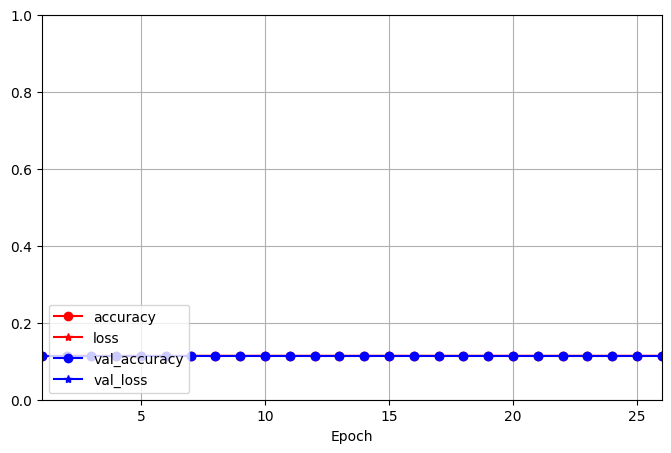

In [38]:
import matplotlib.pyplot as plt

def plot_learning_curves(history):
    plt.figure(figsize=(8, 5))
    for key, style in zip(history.history, ["r-o","r-*","b-o","b-*"]):
        epochs = np.array(history.epoch)
        plt.plot(epochs + 1, history.history[key], style, label=key)
    plt.xlabel("Epoch")
    plt.axis([1,len(history.history['loss']), 0., 1])
    plt.legend(loc="lower left")
    plt.grid()
plot_learning_curves(model.history)

3. Create a function `get_model()`that returns this model